##  Model with same dropout rate(0.5) for dropout layers.



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping






In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
initializer = tf.keras.initializers.HeUniform()

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 9.8 MB/s eta 0:00:00


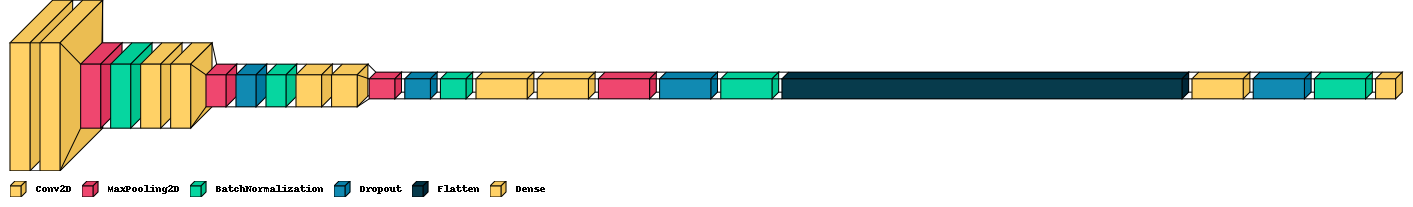

In [ ]:
#visualize the CNN Model that we created

#Install Visual Keras
!pip install visualkeras

# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=0.5,legend=True)

This model consists of 14 layers. There are four 2D convolutional layers with with increasing filters (64, 128, 256, 512), each having a (3, 3) kernel size, 'relu' activation, and 'same' padding. four Max-pooling layers of pool size (2,2) are used in the layers. The model includes three dropout layers with a dropout rate of 0.5. One flatten is used to convert 2D features to 1D features.

In [ ]:
model.summary()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs with a batch size of 25
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      640       
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 128, 128, 64)     256       


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 256)       295168    
          

The model is compiled with the 'RMSprop' optimizer and the 'sparse_categorical_crossentropy' loss function.The accuracy metric is used to evaluate the model's performance.the model is trained for 20 epochs with a batch size of 25. Here test accuracy is 90% and validation accuracy is 91% .

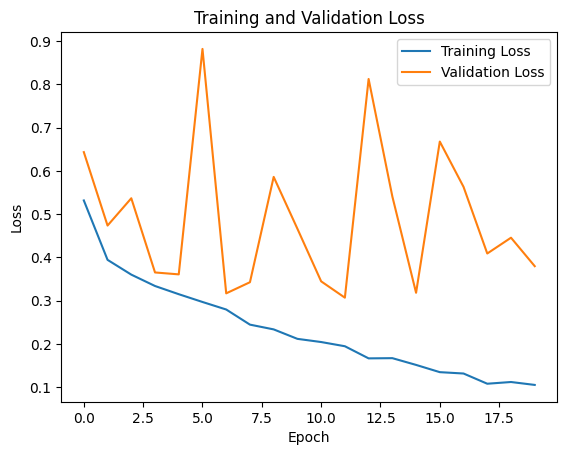

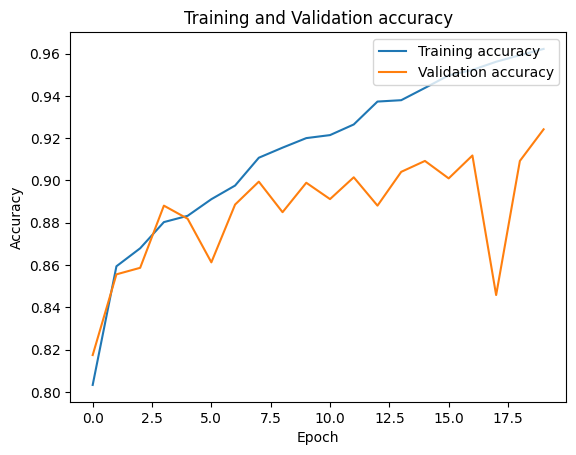

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

test_pred_labels = np.argmax(model.predict(test_images), axis=1)

# Get the classification report for the test data
print(classification_report(test_labels, test_pred_labels))


76/76 [==============================] - 2s 20ms/step
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2014
           1       0.87      0.55      0.67       409

    accuracy                           0.91      2423
   macro avg       0.89      0.77      0.81      2423
weighted avg       0.91      0.91      0.90      2423



Confusion matrix:
[[1980   34]
 [ 185  224]]


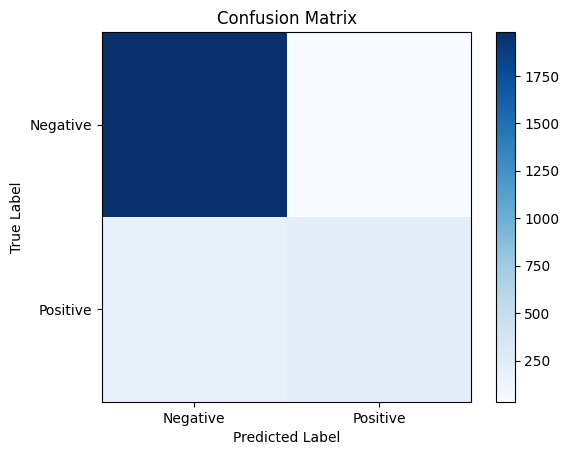

In [ ]:

# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_pred_labels)

print('Confusion matrix:')
print(cm)

# Visual representation of the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


the model predicted 1980 instances correctly as original (true negative), while 34 instances were incorrectly predicted as fake (false positive). 185 instances were incorrectly predicted as original (false negative), and 224 instances were correctly predicted as fake (true positive).

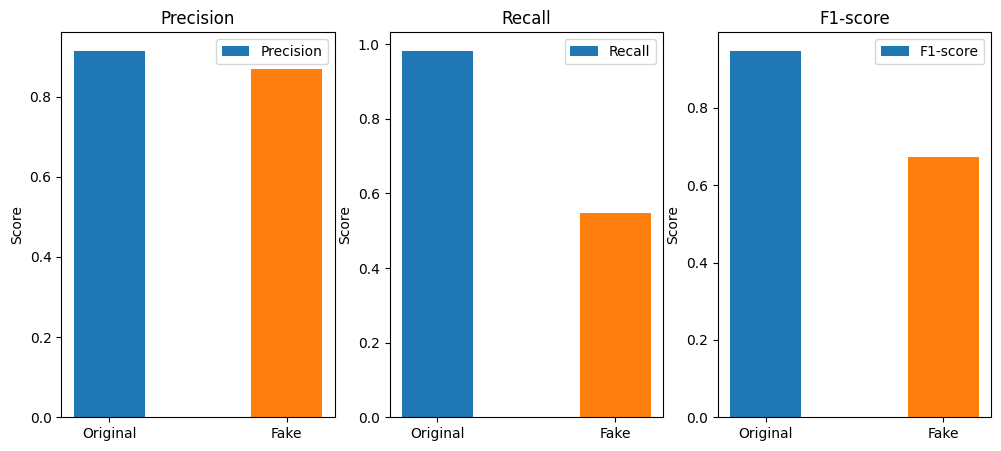

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_pred_labels)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision,recall and f1-score for the original class are more than the fake class.